# Convolutional Neural Network - CIFAR10 raw data using Keras

This notebook will guide you through the use of the `keras` package to train a multilayer perceptron for image recognition. You are going to use the `CIFAR10` dataset.

If Keras is not installed: `pip install keras` in your terminal.

## Loading the packages

In [1]:
import numpy as np
from matplotlib import pyplot as pl
from PIL import Image

from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.utils import np_utils
from sklearn import metrics as me

%matplotlib inline

Using TensorFlow backend.


Define a function to plot some images from CIFAR

In [2]:
def show_imgs(X):
    pl.figure(1)
    k = 0
    for i in range(0,4):
        for j in range(0,4):
            pl.subplot2grid((4,4),(i,j))
            pl.imshow(Image.fromarray(X[k]))
            k = k+1
    # show the plot
    pl.show()

## Loading the raw data
First load the `cifar10` dataset, flatten the pixel values into a vector and normalize all values to be in the range [0, 1]

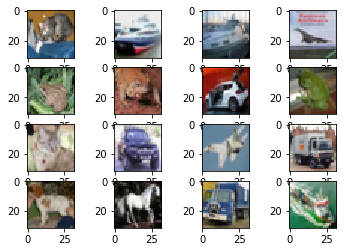

training input shape :  (50000, 32, 32, 3)
training output shape:  (50000, 1)
testing input shape  :  (10000, 32, 32, 3)
testing output shape :  (10000, 1)
50000 train samples
10000 test samples


In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
show_imgs(X_test[:16])  #shows the first 16 images of the test set
print('training input shape : ', X_train.shape)
print('training output shape: ', y_train.shape)
print('testing input shape  : ', X_test.shape)
print('testing output shape : ', y_test.shape)

# X_train = X_train.reshape(50000, 3072)
# X_test = X_test.reshape(10000, 3072)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

The target values of the network are supposed to be 1-hot targets. Now the `y_train` is an array with scalar values as in `[5 0 4 1 ...]` and it should be a 1-hot array `Y_train` as in : 

`[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]...]`
 
Note the change of capital letter in the `Y_train` to denote, per convention, an array with multiple dimensions.

In [4]:
n_classes = 10
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print(Y_train[:10])

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


## Define the network
The neural network will be a CNN. We will train through E epochs, using batches of size B. We can try with 30 epochs and batches of 128 images.

In [6]:
H = 300               # number of neurons hidden layer
E = 10                # number of epochs
B = 128               # batch size
D = X_train.shape[1]  # dimension of input sample - 3072 for CIFAR10

cnn = Sequential()
cnn.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', input_shape=(32, 32, 3)))
cnn.add(Activation('relu'))
cnn.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same'))
cnn.add(Activation('relu'))
cnn.add(MaxPooling2D(pool_size=2))
cnn.add(Flatten())
cnn.add(Dense(n_classes, activation='softmax'))

cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_13 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_14 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                81930     
Total para

## Compile and train the network
In Keras, we call the methods `compile()` and `fit()`. For the compile phase, we need to specify the **loss** function which should be set in the case of multi-class classification to `categorical_crossentropy`. We also need to specify the optimizer strategy. In this case the `rmsprop` or `adam` can be used.

In [7]:
cnn.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])
log = cnn.fit(X_train, Y_train, batch_size=B, epochs=E,
                    verbose=1, validation_data=(X_test, Y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 94s 2ms/step - loss: 1.5113 - acc: 0.4679 - val_loss: 1.2547 - val_acc: 0.5609
Epoch 2/10
50000/50000 [==============================] - 107s 2ms/step - loss: 1.1692 - acc: 0.5918 - val_loss: 1.1266 - val_acc: 0.6053
Epoch 3/10
50000/50000 [==============================] - 113s 2ms/step - loss: 1.0378 - acc: 0.6415 - val_loss: 1.0587 - val_acc: 0.6258
Epoch 4/10
50000/50000 [==============================] - 111s 2ms/step - loss: 0.9527 - acc: 0.6690 - val_loss: 1.0240 - val_acc: 0.6446
Epoch 5/10
50000/50000 [==============================] - 112s 2ms/step - loss: 0.8895 - acc: 0.6931 - val_loss: 0.9888 - val_acc: 0.6580
Epoch 6/10
50000/50000 [==============================] - 144s 3ms/step - loss: 0.8343 - acc: 0.7132 - val_loss: 0.9657 - val_acc: 0.6677
Epoch 7/10
50000/50000 [==============================] - 137s 3ms/step - loss: 0.7915 - acc: 0.7270 - val_loss: 0.9741 - v

## Evaluate the network

We can do this at three levels: (1) plot of the loss during the training phase, (2) overall accuracy evaluation on test set and (3) per class evaluation with confusion matrix on test set.

### Loss evolution during training
This can be done first looking at the history of the training (output of the `fit()` function).

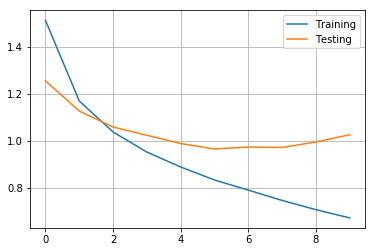

In [8]:
pl.plot(log.history['loss'], label='Training')
pl.plot(log.history['val_loss'], label='Testing')
pl.legend()
pl.grid()

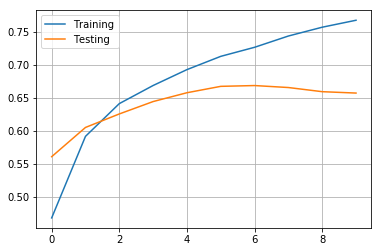

In [9]:
pl.plot(log.history['acc'], label='Training')
pl.plot(log.history['val_acc'], label='Testing')
pl.legend()
pl.grid()

### Model evaluation
We can compute the overall performance on test set calling the `evaluate()` function on the model. The function returns the loss and the metrics used to compile the models.

In [10]:
loss_test, metric_test = cnn.evaluate(X_test, Y_test, verbose=1)
print('Test loss:', loss_test)
print('Test accuracy:', metric_test)

10000/10000 [==============================] - 5s 510us/step
Test loss: 1.026359952545166
Test accuracy: 0.6575


### Confusion matrix
We can call the `predict_classes()` function to get the predicted classes. The output of this function is an array with the predicted class labels as in `[5 0 4 1 ...]`. The output array of ground truth `y_test` and the predicted classes can then be fed to the `confusion_matrix()` function of [sklearn metrics package](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix).

In [11]:
pred = cnn.predict_classes(X_test, verbose=1)
me.confusion_matrix(y_test, pred)

10000/10000 [==============================] - 5s 452us/step


array([[624,   7,  89,  18,  27,  16,  25,   8, 135,  51],
       [ 45, 622,  16,   8,  11,  10,  23,  13,  74, 178],
       [ 49,   1, 520,  32, 116, 100, 108,  50,  16,   8],
       [ 13,   6,  84, 334,  74, 279, 142,  29,  24,  15],
       [ 16,   1,  79,  26, 633,  36, 128,  65,  14,   2],
       [  7,   0,  66, 103,  48, 645,  64,  50,  14,   3],
       [  7,   0,  43,  30,  28,  25, 857,   3,   3,   4],
       [ 10,   0,  41,  22,  92,  82,  21, 711,   7,  14],
       [ 49,  21,  10,  11,   8,   9,  19,   3, 843,  27],
       [ 41,  29,  14,  14,  11,  13,  18,  18,  56, 786]])

## Data Augmentation

Overfitting can be caused by having networks with too many parameters that are trained on too few samples. Through training, the model learns *by hart* and generalizes poorly.

**Data augmentation** takes the approach of generating artificially more training data from existing training samples. For images, data augmentation is performed via a number of random transformations that yield believable-looking images. The goal is that at training time, the model will not see the exact same picture twice. This helps expose the model to more aspects of the data and generalize better.

In Keras, this can be done by configuring a number of random transformations to be performed on the images read by the ```ImageDataGenerator``` instance.

- rotation_range is a value in degrees (0–180), a range within which to randomly rotate pictures.
- width_shift and height_shift are ranges (as a fraction of total width or height) within which to randomly translate pictures vertically or horizontally.
- shear_range is for randomly applying shearing transformations.
- zoom_range is for randomly zooming inside pictures.

In [13]:
from keras.preprocessing.image import ImageDataGenerator
gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                         height_shift_range=0.08, zoom_range=0.08)
batches = gen.flow(X_train, Y_train, batch_size=128)
val_batches = gen.flow(X_test, Y_test, batch_size=128)

In [14]:
H = 300               # number of neurons hidden layer
E = 10                # number of epochs
B = 128               # batch size
D = X_train.shape[1]  # dimension of input sample - 3072 for CIFAR10

cnn = Sequential()
cnn.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', input_shape=(32, 32, 3)))
cnn.add(Activation('relu'))
cnn.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same'))
cnn.add(Activation('relu'))
cnn.add(MaxPooling2D(pool_size=2))
cnn.add(Flatten())
cnn.add(Dense(n_classes, activation='softmax'))

cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_15 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_16 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                81930     
Total para

In [15]:
cnn.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])
history1 = cnn.fit_generator(batches, steps_per_epoch=50000//128, epochs=50,
                    validation_data=val_batches, validation_steps=10000//128, use_multiprocessing=True)

Epoch 1/50
390/390 [==============================] - 95s 242ms/step - loss: 1.6009 - acc: 0.4293 - val_loss: 1.3784 - val_acc: 0.5072
Epoch 2/50
390/390 [==============================] - 117s 300ms/step - loss: 1.3085 - acc: 0.5402 - val_loss: 1.2605 - val_acc: 0.5575
Epoch 3/50
390/390 [==============================] - 126s 322ms/step - loss: 1.1940 - acc: 0.5825 - val_loss: 1.1466 - val_acc: 0.6006
Epoch 4/50
390/390 [==============================] - 139s 356ms/step - loss: 1.1236 - acc: 0.6055 - val_loss: 1.1429 - val_acc: 0.5937
Epoch 5/50
390/390 [==============================] - 157s 404ms/step - loss: 1.0697 - acc: 0.6248 - val_loss: 1.0754 - val_acc: 0.6198
Epoch 6/50
390/390 [==============================] - 165s 422ms/step - loss: 1.0431 - acc: 0.6365 - val_loss: 1.0666 - val_acc: 0.6245
Epoch 7/50
390/390 [==============================] - 155s 397ms/step - loss: 1.0086 - acc: 0.6487 - val_loss: 1.0200 - val_acc: 0.6476
Epoch 8/50
390/390 [=============================

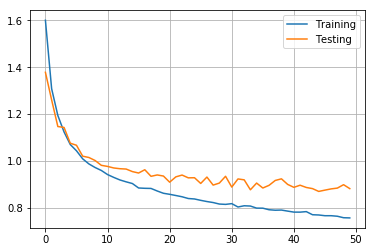

In [16]:
pl.plot(history1.history['loss'], label='Training')
pl.plot(history1.history['val_loss'], label='Testing')
pl.legend()
pl.grid()

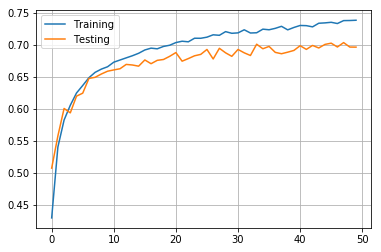

In [17]:
pl.plot(history1.history['acc'], label='Training')
pl.plot(history1.history['val_acc'], label='Testing')
pl.legend()
pl.grid()

In [18]:
loss_test, metric_test = cnn.evaluate(X_test, Y_test, verbose=1)
print('Test loss:', loss_test)
print('Test accuracy:', metric_test)

10000/10000 [==============================] - 5s 476us/step
Test loss: 0.8876823945999146
Test accuracy: 0.7121


### Table of results


| CNN | Architecture description | Acc. train | Acc. test |
|-----|--------------------------|------------|-----------|
|  no DA | CONV(32F,same)-RELU-CONV(32F,same)-RELU-MAXP(2)-DENSE | 76.8%  | 65.8% |
|  with DA | CONV(32F,same)-RELU-CONV(32F,same)-RELU-MAXP(2)-DENSE | 73.4%  | 71.2% |

We can observe that without data augmentation, the accuracy on the train set is much higer than the accuracy on the test set. We can also observe that we can increase the accuracy significantly on the test set.

## Visualizing What My Model Learns

Deep-learning models are often qualified as **black boxes**. Although this is partially true for certain types of deep-learning models, it’s definitely not true for convolutional neural networks. The representations learned by CNNs are highly amenable to visualization, in large part because their inherent property to preserve spatial information within the activation maps.

We will here visualize the intermediate activation maps of the CNN. Visualizing intermediate activations consists of displaying the maps that are output by various convolution and pooling layers in a network, given a certain input. This gives a view into how an input is decomposed into the different filters learned by the network.

We will make the assumption that each filter encodes relatively independent features, so the proper way to visualize these feature maps is by independently plotting the contents of every channel as a 2D image.

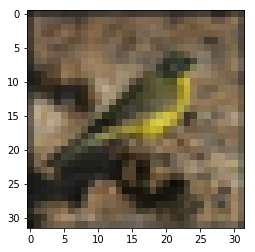

In [68]:
test_im1 = X_train[701]
pl.imshow(test_im1.reshape(32,32,3), 
           interpolation='none')
pl.show()

In order to extract the feature maps we create a Keras model that takes batches of images as input, and outputs the activations of all convolution and pooling layers. To do this, we need to use the Keras class Model. A model is instantiated using two arguments: an input tensor (or list of input tensors) and an output tensor (or list of output tensors). The resulting class is a Keras model, mapping the specified inputs to the specified outputs. When fed an image input, this model returns the values of the layer activations in the original model.

In [69]:
import matplotlib.pyplot as pl

def plot_activations(activations, n_fig_x, n_fig_y): #n_fig_x * n_fig_y < 32
    pl.figure(1, figsize=(15,15))
    k = 0
    for i in range(0, n_fig_x):
        for j in range(0, n_fig_y):
            pl.subplot2grid((n_fig_x, n_fig_y), (i, j))
            pl.axis('off')
            pl.matshow(activations[0, :, :, k], fignum=False, cmap='Greys')
            k = k+1
    pl.show()

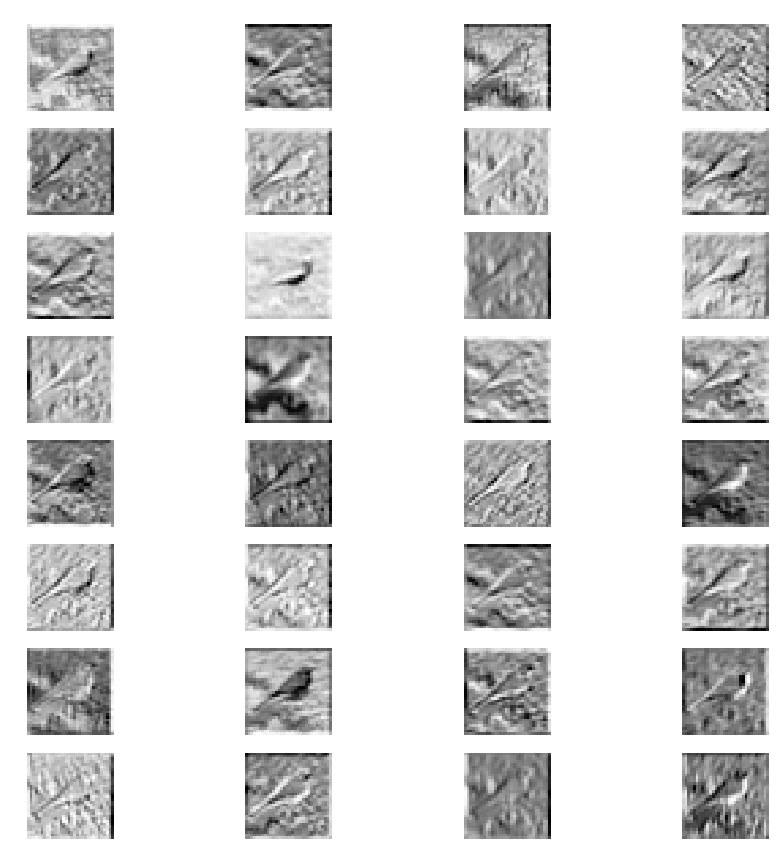

In [70]:
from keras import models
# extracts the output of the first layer
layer_1st_conv = cnn.layers[0].output

# creates a model able to return these outputs, given an input
activation_model = models.Model(inputs=cnn.input, 
                                outputs=layer_1st_conv)

# we need to reshape the image (32,32,3) into (1,32,32,3)
# as the network expect a batch of images as input
test_im1 = test_im1.reshape(1,32,32,3)

# returns the first layer activation
first_layer_activation = activation_model.predict(test_im1)

# display 6 of the activations of the 1st conv layer
plot_activations(first_layer_activation, 8, 4)


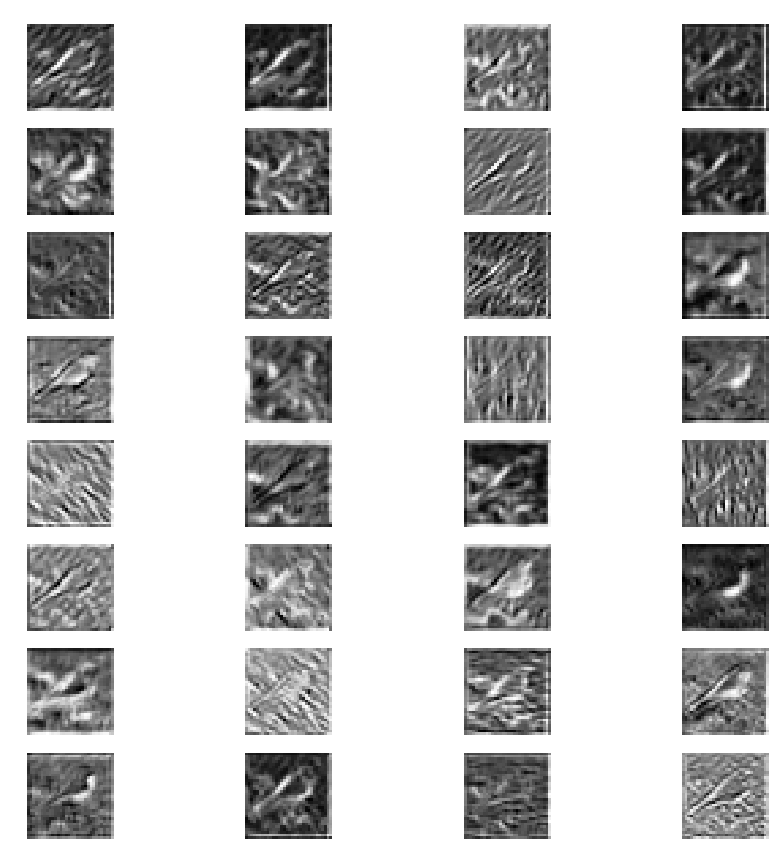

In [71]:
# extracts the output of the first layer
layer_2nd_conv = cnn.layers[2].output

# creates a model able to return these outputs, given an input
activation_model = models.Model(inputs=cnn.input, 
                                outputs=layer_2nd_conv)

# returns the second layer CONV
conv2_activation = activation_model.predict(test_im1)

# display 6 of the activations of the 1st conv layer
plot_activations(conv2_activation, 8, 4)

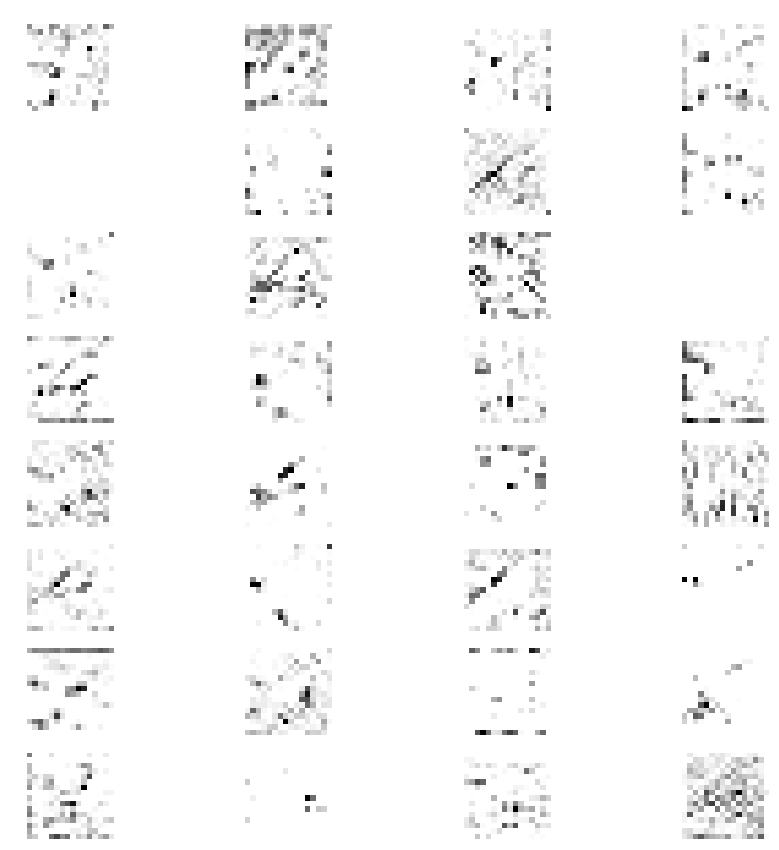

In [72]:
# extracts the output of the first layer
layer_pool = cnn.layers[4].output

# creates a model able to return these outputs, given an input
activation_model = models.Model(inputs=cnn.input, 
                                outputs=layer_pool)

# returns the second layer CONV
pool_activation = activation_model.predict(test_im1)

# display 6 of the activations of the 1st conv layer
plot_activations(pool_activation, 8, 4)

The interpretation is somehow difficult to make but we may observe the effectis of the different filters, each looking at different aspects of the input image. We can see for example that the pooling layer is showing activation on some vertical lines while other are sensitive to horizontal lines.